<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Project_5_seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pylab import rcParams

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/final_date.csv')
df = df.set_index('Date')

In [3]:
df_sleeps = pd.DataFrame(df['sleeps'])
df_sleeps = df_sleeps.iloc[:36:]
df_sleeps

,sleeps
Date,
2017-01-01,2657847
2017-02-01,3081026
2017-03-01,4015775
2017-04-01,5706131
2017-05-01,6002029
2017-06-01,6716372
2017-07-01,7841656
2017-08-01,9021656
2017-09-01,7194693


In [4]:
df_earnings = pd.DataFrame(df['Earnings'])

In [5]:
test_size_percentage = 0.25
test_size = int(test_size_percentage * df_sleeps.shape[0])
train_size_initial = df_sleeps.shape[0] - test_size

train_set = df_sleeps['sleeps'].iloc[:train_size_initial]
test_set = df_sleeps['sleeps'].iloc[train_size_initial:]


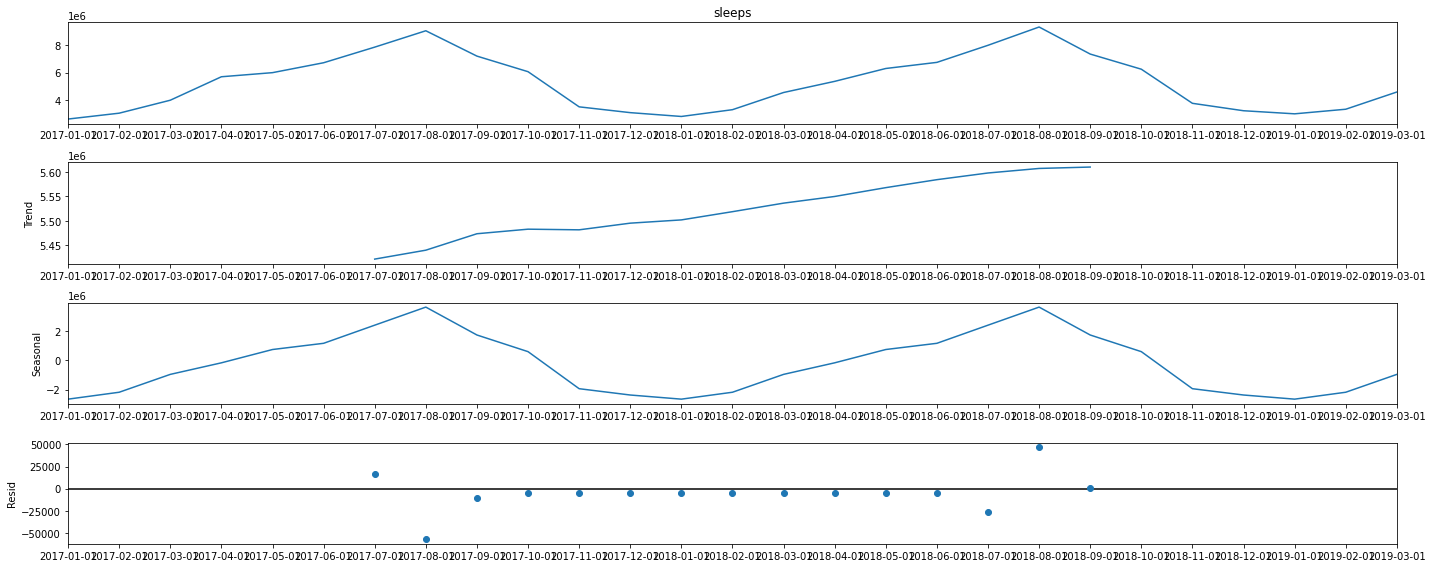

In [6]:
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(x = train_set, period = 12, model='additive')
#decomposition = sm.tsa.seasonal_decompose(x = train_set.rolling(12).mean().dropna(), period = 12, model='additive')
#decomposition2 = sm.tsa.seasonal_decompose(x = (train_set - decomposition.seasonal).dropna(), period = 18, model='additive')
fig = decomposition.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import kpss
alpha = 0.05
kpss(train_set, regression='c', nlags = 'auto') 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.06767909755141062,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

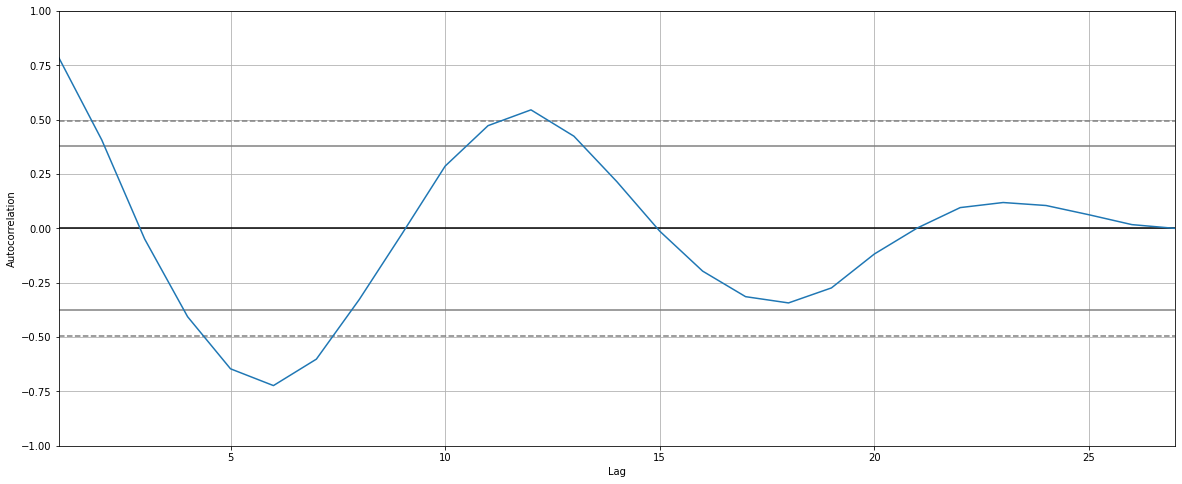

In [8]:
autocorrelation_plot(train_set)
plt.show()

In [9]:
train_set.autocorr(12)

0.9956871036769596

In [10]:
decomposition.seasonal

Date
2017-01-01   -2.652846e+06
2017-02-01   -2.180746e+06
2017-03-01   -9.597565e+05
2017-04-01   -1.698994e+05
2017-05-01    7.395022e+05
2017-06-01    1.164328e+06
2017-07-01    2.403603e+06
2017-08-01    3.638949e+06
2017-09-01    1.732175e+06
2017-10-01    5.937622e+05
2017-11-01   -1.938821e+06
2017-12-01   -2.370250e+06
2018-01-01   -2.652846e+06
2018-02-01   -2.180746e+06
2018-03-01   -9.597565e+05
2018-04-01   -1.698994e+05
2018-05-01    7.395022e+05
2018-06-01    1.164328e+06
2018-07-01    2.403603e+06
2018-08-01    3.638949e+06
2018-09-01    1.732175e+06
2018-10-01    5.937622e+05
2018-11-01   -1.938821e+06
2018-12-01   -2.370250e+06
2019-01-01   -2.652846e+06
2019-02-01   -2.180746e+06
2019-03-01   -9.597565e+05
Name: seasonal, dtype: float64

In [11]:
train_set = pd.DataFrame(train_set)
train_set

,sleeps
Date,
2017-01-01,2657847
2017-02-01,3081026
2017-03-01,4015775
2017-04-01,5706131
2017-05-01,6002029
2017-06-01,6716372
2017-07-01,7841656
2017-08-01,9021656
2017-09-01,7194693


In [12]:
df_sleeps12 = df_sleeps.iloc[:12:]
df_sleeps12 = df_sleeps12.reset_index().rename(columns={'sleeps':'sleeps_2017'})

In [13]:
df_sleeps24 = df_sleeps.iloc[12:24:]
df_sleeps24 = df_sleeps24.reset_index().rename(columns={'sleeps':'sleeps_2018'})

In [14]:
#df_sleeps36 = df_sleeps.iloc[24:36:]
#df_sleeps36 = df_sleeps36.reset_index().rename(columns={'sleeps':'sleeps3'})

In [15]:
#df_sleeps48 = df_sleeps.iloc[36:48:]
#df_sleeps48 = df_sleeps48.reset_index().rename(columns={'sleeps':'sleeps4'})
#df_sleeps48

In [16]:
season = pd.concat([df_sleeps12, df_sleeps24], axis=1)
season.drop(['Date'], axis = 1, inplace = True) 

In [17]:
season

,sleeps_2017,sleeps_2018
0,2657847,2843739
1,3081026,3332670
2,4015775,4571119
3,5706131,5374612
4,6002029,6302074
5,6716372,6743203
6,7841656,7974521
7,9021656,9292740
8,7194693,7342627
9,6071385,6250714


In [29]:
season['average'] = season[['sleeps_2017','sleeps_2018']].mean(axis=1)
season
df_months = pd.DataFrame({'months': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
df_season = pd.concat([df_months, season], axis=1)
df_season =df_season[['months','average']]
df_season = df_season.rename(columns={'average':'seasonality_avg'})
df_season

,months,seasonality_avg
0,1,2750793.0
1,2,3206848.0
2,3,4293447.0
3,4,5540371.5
4,5,6152051.5
5,6,6729787.5
6,7,7908088.5
7,8,9157198.0
8,9,7268660.0
9,10,6161049.5


In [30]:
df_season.to_csv('seasonality.csv')

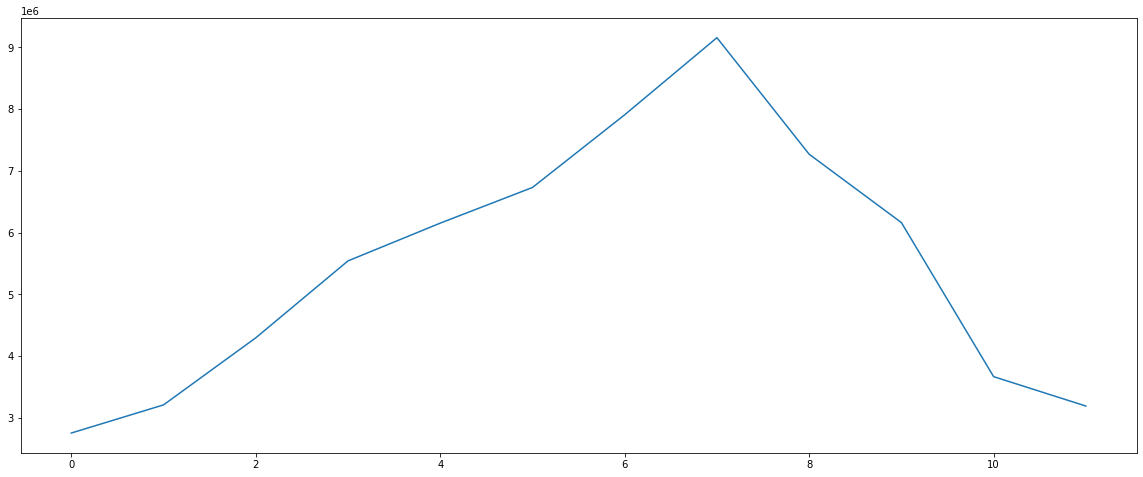

In [21]:
plt.plot(season['average'])